### Making *Chandra* and *Lynx* Mock Observations for Bernd Husemann's cool Dual AGN at z=3.3

The source is [LBQS 0302-0019](http://ned.ipac.caltech.edu/ui/?q=objsearch&corr_z=1&list_limit=5&extend=no&out_csys=Equatorial&hconst=73&objname=LBQS%200302-0019&out_equinox=J2000.0&img_stamp=YES&omegav=0.73&obj_sort=RA%20or%20Longitude&omegam=0.27&of=pre_text) (NED link). 

Bernd has discovered that this is a dual AGN at a common redshift of $z=3.3$, with an angular (physical) separation of $2.9''$ ($20$ kpc). We want to simulate a *Chandra* and *Lynx* observation of this system. These are MUSE Ly$\alpha$ and HeII line images from his paper: 


![We want to make this](images/whatwewant.png)

Unfortunately, although this is a very well studied AGN, the ROSAT observation is a no-go: 

![Damn](images/impey.png)

... and the recent XMM observation is still proprietary: 



![Damn2](images/xmm.png)

There is no existing *Chandra* observation. 



In [4]:
import matplotlib.pyplot as plt
import soxs

In [33]:
% matplotlib inline

def styleplots():
    """
    Make plots pretty and labels clear. 
    """
    plt.style.use('ggplot')

    labelsizes = 15

    plt.rcParams['font.size'] = labelsizes
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['axes.labelsize'] = labelsizes
    plt.rcParams['xtick.labelsize'] = labelsizes
    plt.rcParams['ytick.labelsize'] = labelsizes
    
styleplots() # Make plots pretty

### Create a Power-Law spectrum for the bright source

__The largest uncertainty is the X-ray flux (normalization) of the main AGN__

We'll need to play with this, Bernd!

In [25]:
bright_flux = 1.0e-13 # erg/s/cm**2
faint_flux = bright_flux / 600

In [26]:
photon_index = 1.8 # Quasars tend to have alphas of ~1.8
norm = 1.0e-7 # Normalization at 1 keV in source frame, in units of photons cm-2 s-1 keV-1
zobs = 3.3
emin = 0.1
emax = 10.0
nbins = 20000
bright_spec = soxs.Spectrum.from_powerlaw(photon_index, zobs, norm, emin, emax, nbins)

In [27]:
bright_spec

Spectrum (0.1 keV - 10.0 keV)
    Total Flux:
    5.566956205100304e-08 ph / (cm2 s)
    5.532944284603415e-17 erg / (cm2 s)

In [28]:
faint_spec = soxs.Spectrum.from_powerlaw(photon_index, zobs, norm, emin, emax, nbins)

Re-normalize the spectra using energy fluxes between 0.1 and 10 keV

In [30]:
bright_spec.rescale_flux(bright_flux, emin=emin, emax=emax, flux_type="energy")
faint_spec.rescale_flux(faint_flux, emin=emin, emax=emax, flux_type="energy")

Apply foreground absorption to both of them

In [31]:
n_h_1 = 1000 # x10^20 atoms/cm^2
n_h_2 = 10000 # x10^20 atoms/cm^2

In [32]:
bright_spec.apply_foreground_absorption(n_h_1)
faint_spec.apply_foreground_absorption(n_h_1)

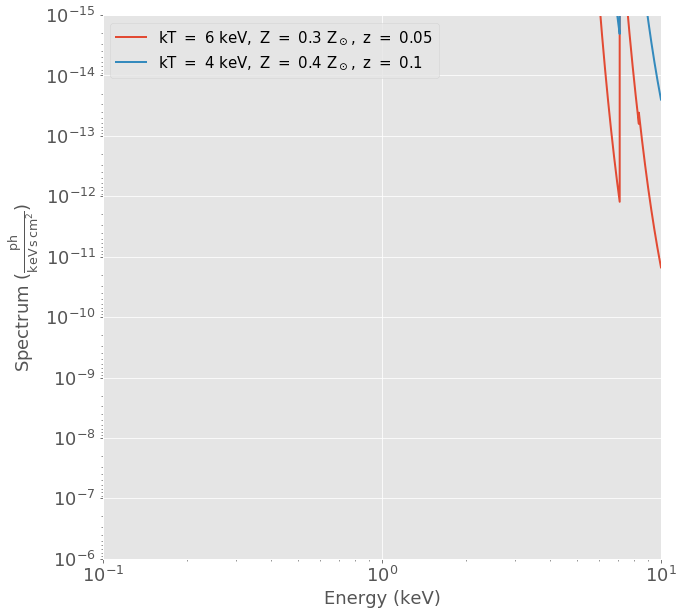

In [45]:
fig, ax = bright_spec.plot(xmin=0.1, xmax=10, ymin=1.0e-6, ymax=1.0e-15, 
                     label="$\mathrm{kT\ =\ 6\ keV,\ Z\ =\ 0.3\ Z_\odot,\ z\ =\ 0.05}$")
faint_spec.plot(label="$\mathrm{kT\ =\ 4\ keV,\ Z\ =\ 0.4\ Z_\odot,\ z\ =\ 0.1}$",
           fig=fig, ax=ax)
ax.legend()
